# Graviational Orbit in Cartesian
This notebook explores the 2-body gravity problem in 2-dimensions. 

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp


The Lagrangian for the 2-body gravitation problem can be expressed as:

$\begin{align}
  \mathcal{L}(x_1,y_1,x_2,y_2,\dot x_1,\dot y_1,\dot x_2,\dot y_2) = \frac12 m_1 (\dot x_1^2 + \dot y_1^2) + \frac12 m_2 (\dot x_2^2 + \dot y_2^2) + \frac{G m_1 m_2}{\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}}
\end{align}$,

with the corresponding Euler-Lagrange equations:

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial x_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} \; \rightarrow \; \ddot x_1\: = \: \frac{- G m_2 (x_1 - x_2)}{\big((x_1-x_2)^2 + (y_1-y_2)^2\big)^{3/2}}
\end{align}$,

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial y_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} \; \rightarrow \; \ddot y_1\: = \: \frac{- G m_2 (y_1 - y_2)}{\big((x_1-x_2)^2 + (y_1-y_2)^2\big)^{3/2}}
\end{align}$,

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial x_2} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} \; \rightarrow \; \ddot x_2\: = \: \frac{G m_1 (x_1 - x_2)}{\big((x_1-x_2)^2 + (y_1-y_2)^2\big)^{3/2}}
\end{align}$,

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial y_2} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} \; \rightarrow \; \ddot y_2\: = \: \frac{G m_1 (y_1 - y_2)}{\big((x_1-x_2)^2 + (y_1-y_2)^2\big)^{3/2}}
\end{align}$,

which are solved in the class below with the solve_ivp function to generate a plot of the orbits of the 2 bodies.

The class also implements the Leapfrog method of solving differential equations outlined by the algorithm the below:

$\begin{align}
   \dot q_{k_{i+1/2}} &= \dot q_{k_{i}} + \frac{d\mathbf{z}_i(\dot q_k)}{dt}  \Delta t/2 \\
   q_{k_{i+1}} &= q_{ k_i} +  \dot q_{k_{i+1/2}}  \Delta t  \\
   \dot q_{k_{i+1}} &= \dot q_{k_{i+1/2}} + \frac{d\mathbf{z}_{i+1}(\dot q_k)}{dt}  \Delta t/2,
\end{align}$

where $q_k$ represents each generalized coordinate $x_1, y_1, x_2, y_2$, and $\mathbf{z}_{i+1}(\dot q_k)$ corresponds to the value of the index of $\mathbf{z}$ that contains $\dot q_k$. The advantage of this solver method is it conserves the energy of the system in time.

In [269]:
class Gravity_2body():
    """
    Gravity_2body class implements the parameters and differential equations for the 2-body gravitation problem.
     
    Parameters
    ----------
    G : float
        gravitational constant
    m1 : float
        mass of body 1
    m2 : float
        mass of body 2

    Methods
    -------
    dz_dt(z, t)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z.
    """
    def __init__(self,
                 G=1.,
                 m1=1.,
                 m2=1.
                ):
        self.G = G 
        self.m1 = m1
        self.m2 = m2
     
    
    def dz_dt(self, t, z):
        """
        This function returns the solutions to the E-L equations above.
        
        Parameters
        ----------
        y : float
            A 8-component vector with z[0] = x1(t), z[1] = y1(t), z[2] = x2(t), z[3] = y2(t),
                z[4] = x1_dot, z[5] = y1_dot, z[6] = x2_dot, z[7] = y2_dot
        t : float
            time 
            
        Returns
        -------
        
        """
        separation = ((z[0]-z[2])**2 + (z[1]-z[3])**2)**(1/2.) # distance between masses
        x1_ddot = -self.G*self.m2*(z[0]-z[2]) / separation**3
        y1_ddot = -self.G*self.m2*(z[1]-z[3]) / separation**3
        x2_ddot = self.G*self.m1*(z[0]-z[2]) / separation**3
        y2_ddot = self.G*self.m1*(z[1]-z[3]) / separation**3
        
        return [z[4], z[5], z[6], z[7], x1_ddot, y1_ddot, x2_ddot, y2_ddot]
    
    
    def solve_ode(self, t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, method='RK23',
                abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        z = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0] 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                            z, t_eval=t_pts,
                            atol=abserr, rtol=relerr)
        x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot  = solution.y

        return [x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot]
    
    
    def solve_ode_Leapfrog(self, t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for each necessary component of the LF method
        num_t_pts = len(t_pts)
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        y1[0] = y1_0
        x2[0] = x2_0
        y2[0] = y2_0
        x1_dot[0] = x1_dot_0
        y1_dot[0] = y1_dot_0
        x2_dot[0] = x2_dot_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equations for each coordinate
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            z = [x1[i], y1[i], x2[i], y2[i], x1_dot[i], y1_dot[i], x2_dot[i], y2_dot[i]]
    
            x1_dot_half[i] = x1_dot[i] + self.dz_dt(t, z)[4] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1_dot[i] + self.dz_dt(t, z)[5] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2_dot[i] + self.dz_dt(t, z)[6] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2_dot[i] + self.dz_dt(t, z)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            z = [x1[i+1], y1[i+1], x2[i+1], y2[i+1], x1_dot[i+1], y1_dot[i+1], x2_dot[i+1], y2_dot[i+1]]
            x1_dot[i+1] = x1_dot_half[i] + self.dz_dt(t, z)[4] * delta_t/2.
            y1_dot[i+1] = y1_dot_half[i] + self.dz_dt(t, z)[5] * delta_t/2.
            x2_dot[i+1] = x2_dot_half[i] + self.dz_dt(t, z)[6] * delta_t/2.
            y2_dot[i+1] = y2_dot_half[i] + self.dz_dt(t, z)[7] * delta_t/2.
            
        return x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot  
        
    
    def energy(self, t_pts, x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot):
        """Evaluate the energy as a function of time"""
        tot_E = 0.5*self.m1*(x1_dot**2+y1_dot**2) + 0.5*self.m2*(x2_dot**2+y2_dot**2) - self.G*self.m1*self.m2*((x1-x2)**2+(y1-y2)**2)**(-0.5)
        return tot_E
    

In [270]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, semilogy_e=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (semilogy_e):
        line, = ax.semilogy(x, y, base=np.e, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [271]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [272]:
# Cartesian axes label
y_vs_x_label = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  


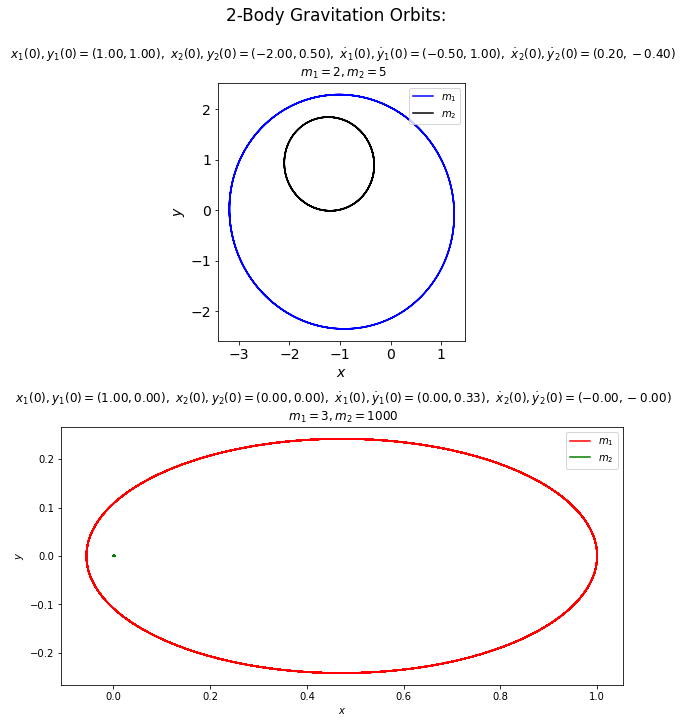

In [273]:
G = 1.
m1 = 2.
m2 = 5.

# Instantiate a 2-body system
G1 = Gravity_2body(G=G, m1=m1, m2=m2)

# initial conditions
x1_0 = 1.
y1_0 = 1.
x2_0 = -2.0
y2_0 = 0.5
x1_dot_0 = -.5
y1_dot_0 = 1.
x2_dot_0 = -m1/m2*x1_dot_0 # in order for c-o-m velocity to be 0 
y2_dot_0 = -m1/m2*y1_dot_0 # ^ ^ ^ 
x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = G1.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

# start the plot!
fig = plt.figure(figsize=(16,10))
font_size = 14
plt.rcParams.update({'font.size': font_size})
overall_title = '2-Body Gravitation Orbits:  '

fig.suptitle(overall_title, va='baseline')
    
# plot of y vs x positions of general masses
ax_a = fig.add_subplot(2,1,1)                  

font_size = 10
plt.rcParams.update({'font.size': font_size})
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], # mass 1
            axis_labels=y_vs_x_label, 
            color='blue',
            label=rf'$m_1$', 
            title= rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f})$' + '\n'
                rf' $m_1 = {m1:.0f},  m_2 = {m2:.0f}$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], # mass 2
            color='black',
            label=rf'$m_2$',
            ax=ax_a)
ax_a.set_aspect('equal')

# second case where m2 >> m1:
G_2 = 1/1000.
m1_2 = 3.
m2_2 = 1000.
G2 = Gravity_2body(G=G_2, m1=m1_2, m2=m2_2)

x1_0_2 = 1.
y1_0_2 = 0.
x2_0_2 = 0.
y2_0_2 = 0.
x1_dot_0_2 = 0.
y1_dot_0_2 = 1./m1_2
x2_dot_0_2 = -m1_2/m2_2*x1_dot_0_2 # in order for c-o-m velocity to be 0 
y2_dot_0_2 = -m1_2/m2_2*y1_dot_0_2 # ^ ^ ^ 

x1_2, y1_2, x2_2, y2_2, x1_dot_2, y1_dot_2, x2_dot_2, y2_dot_2 = G2.solve_ode(t_pts, x1_0_2, y1_0_2, x2_0_2, y2_0_2, x1_dot_0_2, y1_dot_0_2, x2_dot_0_2, y2_dot_0_2)

# plot of y vs x positions with m2 >> m1
ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1_2[start : stop], y1_2[start : stop], # mass 1
            axis_labels=y_vs_x_label, 
            color='red',
            label=rf'$m_1$', 
            title= rf' $x_1(0),y_1(0) = ({x1_0_2:.2f},{y1_0_2:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0_2:.2f},{y2_0_2:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0_2:.2f},{y1_dot_0_2:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0_2:.2f},{y2_dot_0_2:.2f})$' + '\n'
                rf' $m_1 = {m1_2:.0f},  m_2 = {m2_2:.0f}$',
            ax=ax_b)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2_2[start : stop], y2_2[start : stop], # mass 2
            color='green',
            label=rf'$m_2$',
            ax=ax_b)
ax_b.set_aspect('equal')

fig.tight_layout()
fig.savefig('2-body_orbits_final_hw.png', bbox_inches='tight')  



This second plot demonstrates how the 2-body system is well-approximated by a light body orbiting a static heavy body if m2 >> m1. This is the Keplerian model of light bodies orbiting as ellipses around heavy bodies at the focal point. 

# Leapfrog method:
The built-in diff. eq. solver is now compared with the Leapfrog method as was defined earlier.

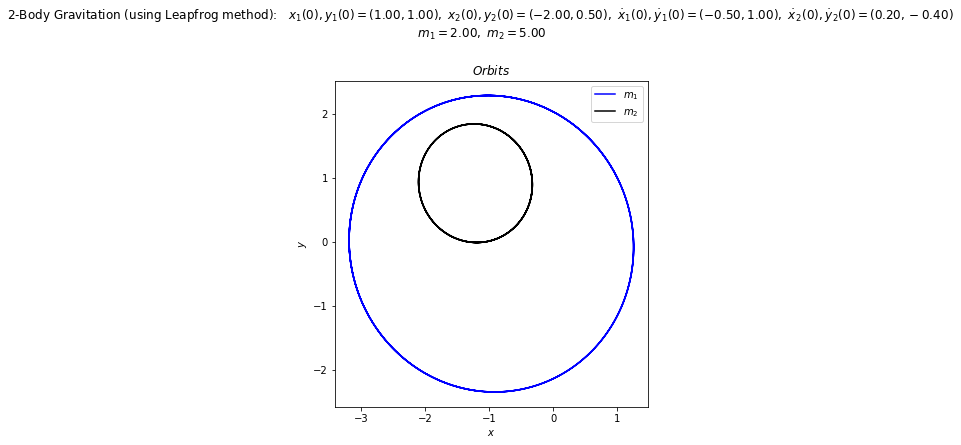

In [274]:
# Leapfrog method:
x1_LF, y1_LF, x2_LF, y2_LF, x1_dot_LF, y1_dot_LF, x2_dot_LF, y2_dot_LF = G1.solve_ode_Leapfrog(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

fig_LF = plt.figure(figsize=(12,6))
overall_title = '2-Body Gravitation (using Leapfrog method):  ' + \
                rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f})$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f}$'

fig_LF.suptitle(overall_title, va='baseline')
    
# y vs x plot 
ax_LF = fig_LF.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], # mass 1
            axis_labels=y_vs_x_labels, 
            color='blue',
            label=rf'$m_1$', 
            title=rf'$Orbits$', 
            ax=ax_LF)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], # mass 2
            color='black',
            label=rf'$m_2$',
            ax=ax_LF)
ax_LF.set_aspect('equal')                                                                                            
                                                                                              
                                                                                              
                                                                                              

This plot is identical to the one above where the built-in solver was used, demonstrating the accuracy of the Leapfrog method.

# Energy Conservation
The advantage of the Leapfrog method is its ability to conserve the energy of a system over time, due to its "time reversal" aspect.

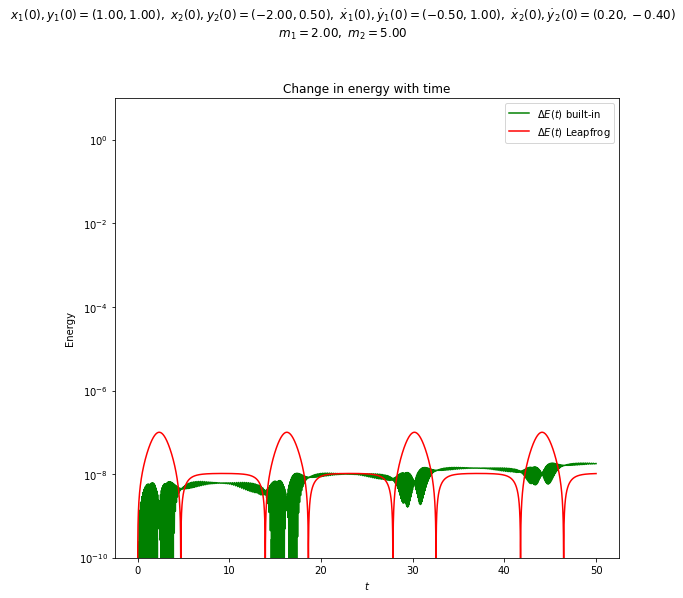

In [275]:
# the 2 methods for solving the diff. eqs.:
x1_pts, y1_pts, x2_pts, y2_pts, x1_dot_pts, y1_dot_pts, x2_dot_pts, y2_dot_pts \
                            = G1.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)
x1_pts_LF, y1_pts_LF, x2_pts_LF, y2_pts_LF, x1_dot_pts_LF, y1_dot_pts_LF, x2_dot_pts_LF, y2_dot_pts_LF \
                            = G1.solve_ode_Leapfrog(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

# calculate the energy of the system at each point in space
E_tot_pts = G1.energy(t_pts, x1_pts, y1_pts, x2_pts, y2_pts, x1_dot_pts, y1_dot_pts, x2_dot_pts, y2_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0) # energy difference from starting point

E_tot_pts_LF = G1.energy(t_pts, x1_pts_LF, y1_pts_LF, x2_pts_LF, y2_pts_LF, x1_dot_pts_LF, y1_dot_pts_LF, x2_dot_pts_LF, y2_dot_pts_LF)
E_tot_0_LF = E_tot_pts_LF[0]
E_tot_rel_pts_LF = np.abs((E_tot_pts_LF - E_tot_0_LF)/E_tot_0_LF) 


fig_3 = plt.figure(figsize=(8,8))

overall_title = rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f})$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f}$'
    
fig_3.suptitle(overall_title, va='baseline')

ax_3a = fig_3.add_subplot(1,1,1)
ax_3a.semilogy(t_pts, E_tot_rel_pts, 
               color='green', label=r'$\Delta E(t)$ RK23')
ax_3a.semilogy(t_pts, E_tot_rel_pts_LF, 
               color='red', label=r'$\Delta E(t)$ Leapfrog')
ax_3a.set_ylim(1.e-10, 1.e1)  
ax_3a.set_xlabel(r'$t$')
ax_3a.set_ylabel(r'Energy')
ax_3a.set_title('Change in energy with time')
ax_3a.legend()

fig_3.tight_layout()
fig_3.savefig('Leapfrog_energy_test_1.png', dpi=200, bbox_inches='tight')



The general trend of $\Delta E$ for the built-in method is upwards, suggesting that the energy is changing in time; however, the Leapfrog method's trend is flat – meaning that energy is being conserved.

## 3-body problem
The following class extends the gravitation problem to a 3-body case.

In [276]:
class Gravity_3body():
    """
    Gravity_3body class implements the parameters and differential equations for the 3-body gravitation problem.
     
    Parameters
    ----------
    G : float
        gravitational constant
    m1 : float
        mass of body 1
    m2 : float
        mass of body 2
    m3 : float
        mass of body 3

    Methods
    -------
    dz_dt(z, t)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z.
    """
    def __init__(self,
                 G=1.,
                 m1=1.,
                 m2=1.,
                 m3=1.
                ):
        self.G = G 
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
     
    
    def dz_dt(self, t, z):
        """
        This function returns the solutions to the E-L equations above.
        
        Parameters
        ----------
        y : float
            A 12-component vector with z[0] = x1(t), z[1] = y1(t), z[2] = x2(t), z[3] = y2(t), z[4] = x3(t), z[5] = y3(t)
                z[6] = x1_dot, z[7] = y1_dot, z[8] = x2_dot, z[9] = y2_dot, z[10] = x3_dot, z[11] = y3_dot
        t : float
            time 
            
        Returns
        -------
        
        """
        separation_12 = ((z[0]-z[2])**2 + (z[1]-z[3])**2)**(1/2.) # distance between masses 1 and 2
        separation_13 = ((z[0]-z[4])**2 + (z[1]-z[5])**2)**(1/2.) # distance between masses 1 and 3
        separation_23 = ((z[2]-z[4])**2 + (z[3]-z[5])**2)**(1/2.) # distance between masses 2 and 3
        x1_ddot = -self.G*self.m2*(z[0]-z[2]) / separation_12**3 - self.G*self.m3*(z[0]-z[4]) / separation_13**3
        y1_ddot = -self.G*self.m2*(z[1]-z[3]) / separation_12**3 - self.G*self.m3*(z[1]-z[5]) / separation_13**3
        x2_ddot = self.G*self.m1*(z[0]-z[2]) / separation_12**3 - self.G*self.m3*(z[2]-z[4]) / separation_23**3
        y2_ddot = self.G*self.m1*(z[1]-z[3]) / separation_12**3 - self.G*self.m3*(z[3]-z[5]) / separation_23**3
        x3_ddot = self.G*self.m1*(z[0]-z[4]) / separation_13**3 + self.G*self.m2*(z[2]-z[4]) / separation_23**3
        y3_ddot = self.G*self.m1*(z[1]-z[5]) / separation_13**3 + self.G*self.m2*(z[3]-z[5]) / separation_23**3
        
        return [z[6], z[7], z[8], z[9], z[10], z[11], x1_ddot, y1_ddot, x2_ddot, y2_ddot, x3_ddot, y3_ddot]
    
    
    def solve_ode(self, t_pts, x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, x3_dot_0, y3_dot_0, method='RK23',
                abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        z = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, x3_dot_0, y3_dot_0] 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                            z, t_eval=t_pts,
                            atol=abserr, rtol=relerr)
        x1, y1, x2, y2, x3, y3, x1_dot, y1_dot, x2_dot, y2_dot, x3_dot, y3_dot  = solution.y

        return [x1, y1, x2, y2, x3, y3, x1_dot, y1_dot, x2_dot, y2_dot, x3_dot, y3_dot]
    
    

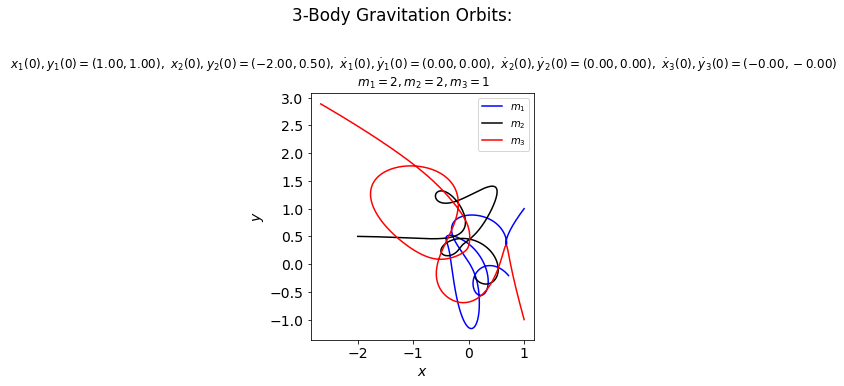

In [288]:
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 
G = 1.
m1 = 2.
m2 = 2.
m3 = 1.

# Instantiate a 2-body system
G3 = Gravity_3body(G=G, m1=m1, m2=m2, m3=m3)

# initial conditions
x1_0 = 1.
y1_0 = 1.
x2_0 = -2.0
y2_0 = 0.5
x3_0 = 1.
y3_0 = -1.
x1_dot_0 = 0
y1_dot_0 = 0.
x2_dot_0 = 0.
y2_dot_0 = 0.  
x3_dot_0 = (-m1*x1_dot_0 - m2*x2_dot_0) / m3  # in order for c-o-m velocity to be 0 
y3_dot_0 = (-m1*y1_dot_0 - m2*y2_dot_0) / m3 # ^ ^ ^

x1, y1, x2, y2, x3, y3, x1_dot, y1_dot, x2_dot, y2_dot, x3_dot, y3_dot = G3.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, x3_dot_0, y3_dot_0)

# start the plot!
fig = plt.figure(figsize=(16,10))
font_size = 14
plt.rcParams.update({'font.size': font_size})
overall_title = '3-Body Gravitation Orbits:  '

fig.suptitle(overall_title, va='baseline')
    
# plot of y vs x positions of general masses
ax_a = fig.add_subplot(2,1,1)                  

font_size = 10
plt.rcParams.update({'font.size': font_size})
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], # mass 1
            axis_labels=y_vs_x_label, 
            color='blue',
            label=rf'$m_1$', 
            title= rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f}), $' + \
                rf' $\dotx_3(0),\doty_3(0) = ({x3_dot_0:.2f},{y3_dot_0:.2f})$' + '\n'
                rf' $m_1 = {m1:.0f},  m_2 = {m2:.0f}, m_3 = {m3:.0f}$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], # mass 2
            color='black',
            label=rf'$m_2$',
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x3[start : stop], y3[start : stop], # mass 3
            color='red',
            label=rf'$m_3$',
            ax=ax_a)

ax_a.set_aspect('equal')